In [1]:
# Load the model from the file
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import joblib

loaded_model = joblib.load("random_forest_model_3rdjan_2nd.pkl")

In [3]:
new_df1= pd.read_csv("data_VIF_corrected.csv")

In [4]:
new_df1= new_df1.dropna()

In [5]:

# Assuming your data is in a pandas DataFrame named 'df'
# Make sure your 'Time' column is in dateTime format
new_df1['Time'] = pd.to_datetime(new_df1['Time'])

# Filter data for dates between January 1, 2021, and December 31, 2022
date_range_start = '2022-01-01'
date_range_end = '2022-12-31'
date_mask = (new_df1['Time'] >= date_range_start) & (new_df1['Time'] <= date_range_end)
filtered_data = new_df1[date_mask]

# Further filter based on 'PM 2.5' range
pm_mask = (filtered_data['PM 2.5'] >= 30) & (filtered_data['PM 2.5'] <= 200)
final_filtered_data = filtered_data[pm_mask]

# Create a new DataFrame with the filtered data
new_df1 = pd.DataFrame(final_filtered_data)

# Display the new DataFrame
print(new_df1)

      Latitude  Longitude       Time   Albedo  Wind_Gust  \
365     22.630     88.352 2022-01-01  5.95050   4.608222   
366     22.630     88.352 2022-01-02  5.86740   4.196869   
367     22.630     88.352 2022-01-03  5.95282   4.312009   
368     22.630     88.352 2022-01-04  5.97282   3.008778   
369     22.630     88.352 2022-01-05  5.98024   2.975285   
...        ...        ...        ...      ...        ...   
9482    22.545     88.340 2022-12-27  5.61565   3.958173   
9483    22.545     88.340 2022-12-28  5.65195   4.912187   
9484    22.545     88.340 2022-12-29  5.74805   3.685035   
9485    22.545     88.340 2022-12-30  5.71075   2.229730   
9486    22.545     88.340 2022-12-31  5.71550   2.000811   

      Planetary_Boundary_Layer_Height       Pressure   R_H_L103  U_GRD_L103  \
365                        327.221340  101737.040875  48.579899    1.313697   
366                        346.867205  101578.573188  51.964699    0.903887   
367                        321.958577  101

In [6]:
X_unseen = new_df1.drop(['PM 2.5','Station Name',"Time"], axis=1)  # Features (excluding the target variable)

In [7]:
#Make predictions on unseen data (replace X_unseen with your actual unseen data)
y_unseen_pred = loaded_model.predict(X_unseen)

#Display the predictions on unseen data
print(y_unseen_pred)
pm=(new_df1["PM 2.5"])
print(pm)


[118.74707373 108.02078503  99.71283472 ...  92.72540306 106.83255746
 112.28832792]
365      73.309167
366      75.214167
367      77.754783
368     111.014167
369     112.290435
           ...    
9482     69.617500
9483    122.754583
9484    102.431667
9485    135.250833
9486    142.677500
Name: PM 2.5, Length: 1947, dtype: float64


In [8]:

rmse = np.sqrt(mean_squared_error(y_unseen_pred, pm))

In [9]:
rmse


28.32570330023408

In [10]:
# Assuming y_actual and y_pred are your actual and predicted values
y_actual_tttt = np.array([pm])  # Replace with your actual values
y_pred_tttt = np.array([y_unseen_pred])  # Replace with your predicted values

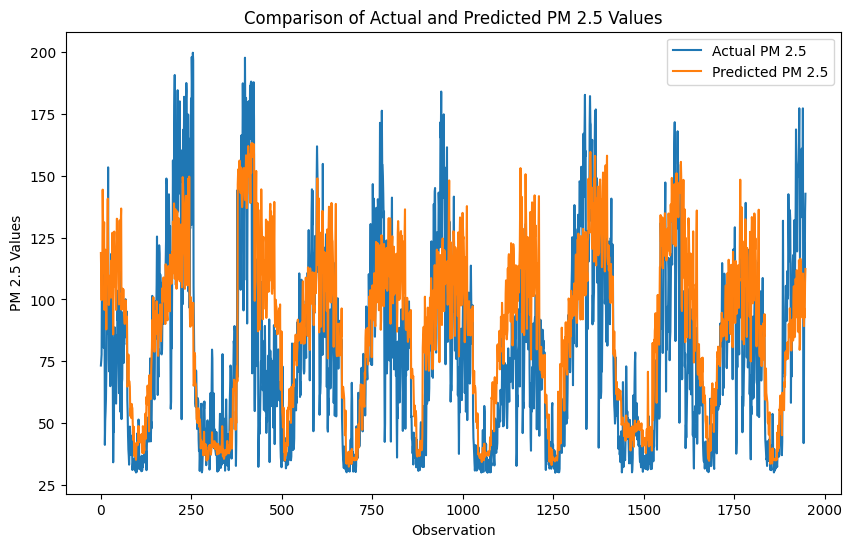

In [11]:
import matplotlib.pyplot as plt


# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(y_actual_tttt.flatten(), label='Actual PM 2.5')
plt.plot(y_pred_tttt.flatten(), label='Predicted PM 2.5')

# Add labels and title
plt.xlabel('Observation')
plt.ylabel('PM 2.5 Values')
plt.title('Comparison of Actual and Predicted PM 2.5 Values')

# Add legend
plt.legend()

# Show the plot
plt.show()
